# LAB 2-1 : Sobel filter

### 1.Inclusion of libraries.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc
from IPython.display import Video

%matplotlib notebook

### 2.Image source specifications.

In [2]:
img_path = 'thai.jpg'

### 3.Image loading and color conversions.

In [3]:
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print('Image shape : %d x %d' % (img_gray.shape[1],img_gray.shape[0]),"pixels")
print('Image data type :', img_gray.dtype)

Image shape : 1024 x 767 pixels
Image data type : uint8


### 4.Sobel filter coefficients.

In [4]:
Wx = np.array([[-1,-2,-1],
              [0,0,0],
              [1,2,1]])

Wy = np.array([[-1,0,1],
              [-2,0,2],
              [-1,0,1]])

### 5.Convolution.

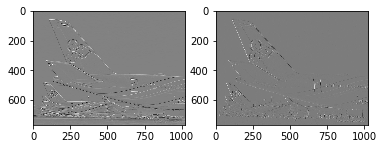

In [5]:
gradient_x = signal.convolve2d(img_gray, Wx, mode='same', boundary='fill', fillvalue=0)
gradient_y = signal.convolve2d(img_gray, Wy, mode='same', boundary='fill', fillvalue=0)

plt.subplot(1, 2, 1)
plt.imshow(gradient_x, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(gradient_y, 'gray')

### 6.Gradient magnitude computations.

Shape : 1024 x 767
Maximum : 952.0
Mininum 0.0
Standard deviation : 101.05834906769175


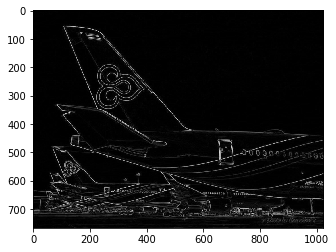

In [6]:
Gxy = np.sqrt(np.power(gradient_x, 2) + np.power(gradient_y, 2))

print('Shape : %d x %d' % (Gxy.shape[1],Gxy.shape[0]))
print('Maximum :', np.max(Gxy))
print('Mininum', np.min(Gxy))
print('Standard deviation :', np.std(Gxy))

plt.imshow(Gxy, 'gray')

### 7.Gradient magnitude normalizations.

Shape : 1024 x 767
Maximum : 255.0
Mininum 0.0
Standard deviation : 27.06920064313172


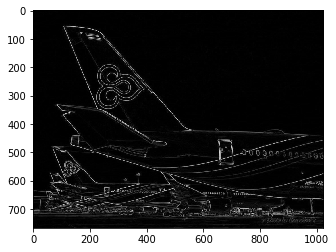

In [7]:
Gxy = Gxy / np.max(Gxy) * 255

print('Shape : %d x %d' % (Gxy.shape[1],Gxy.shape[0]))
print('Maximum :', np.max(Gxy))
print('Mininum', np.min(Gxy))
print('Standard deviation :', np.std(Gxy))

plt.imshow(Gxy, 'gray')

### 8.Gradient histogram visualizations.

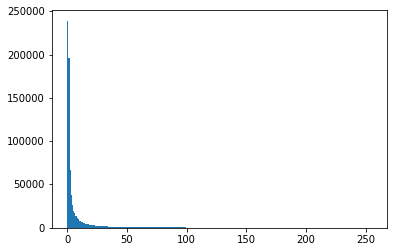

In [8]:
plt.hist(Gxy.ravel(),256,[0,255]); plt.show()

### 9.Video file creation.

In [9]:
filename = 'lab2-1.avi'
output = cv2.VideoWriter(filename,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (Gxy.shape[1],Gxy.shape[0]))

w = np.arange(250, 10, -1)
v = np.arange(10, 250,1)

for i in w:
    ret,thresh = cv2.threshold(Gxy,i,255,cv2.THRESH_BINARY)

    thresh = thresh.astype(np.uint8)
    thresh_3d = np.stack((thresh, thresh, thresh), axis=2)

    output.write(thresh_3d)
    
for i in v:
    ret,thresh = cv2.threshold(Gxy,i,255,cv2.THRESH_BINARY)

    thresh = thresh.astype(np.uint8)
    thresh_3d = np.stack((thresh, thresh, thresh), axis=2)
    
    output.write(thresh_3d)
    
output.release()
print("Video file creation successful!")

Video file creation successful!


### 10.Video file playback.

In [10]:
Video(filename)